In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import pow

In [23]:
def uniformRandomMatrix(n):
    return np.random.uniform(low=-1.0, high=1.0, size=(n,n))

mean = 2.0
variance = 5.0

def normalRandomMatrix(n):
    return np.random.normal(mean, variance, size=(n,n))

In [3]:
def GEPP(A):
    m, n = A.shape
    for i in range(m-1):
        # find best row (pivoting step)
        max_index = np.absolute(A[i:, i]).argmax() + i
        A[[i, max_index]] = A[[max_index, i]]
        # Gaussian elimination step
        for t in range(i+1, m):
            factor = - A[t][i] / A[i][i]
            A[t, i:] += (factor * A[i, i:])
    return A



In [4]:
def growth_factor(A):
    max_A = np.absolute(A).max()
    U = GEPP(A)
    max_U = np.absolute(U).max()
    return max_U / max_A
    

In [24]:
def compute_average_gf(n_range, num_iterations, randomMatrix):
    data = []
    for n in n_range:
        sum_gf = 0.0
        for _ in range(num_iterations):
            A = randomMatrix(n)
            sum_gf += growth_factor(A)
        data.append(sum_gf / num_iterations)
    return np.array(data)
    

Fit the data to c*n**a with c = 0.6498059572954935 and a = 0.6308986987115381


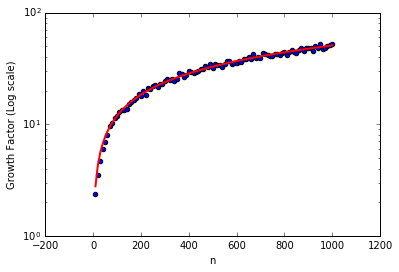

In [25]:
n_range = range(10, 1010, 10)
data = compute_average_gf(n_range, 20, uniformRandomMatrix)
exponential = lambda n, c, a: c * n**a
coefficients, _ = curve_fit(exponential, n_range, data)
c, a = coefficients
print("Fit the data to c*n**a with c = {} and a = {}".format(c, a))
plt.scatter(n_range, data, label='data')
plt.plot(n_range, exponential(n_range, c, a), label="exponential fit", color='r', linewidth='2.0')
plt.xlabel("n")
plt.ylabel("Growth Factor (Log scale)")
plt.yscale("log")
plt.show()

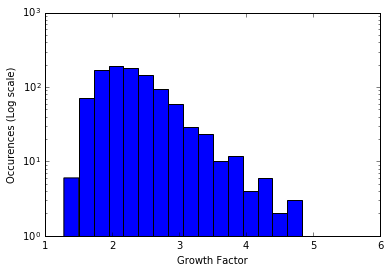

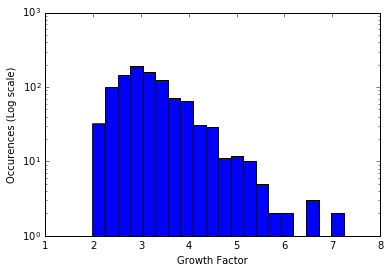

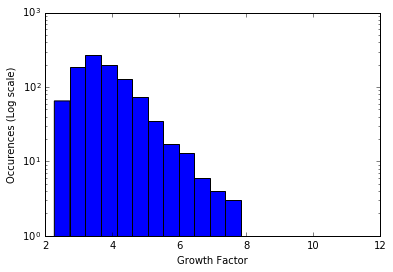

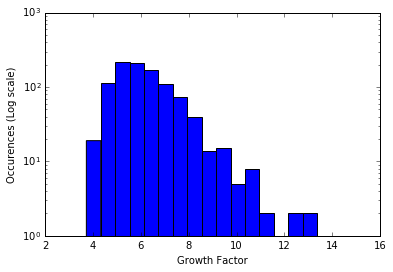

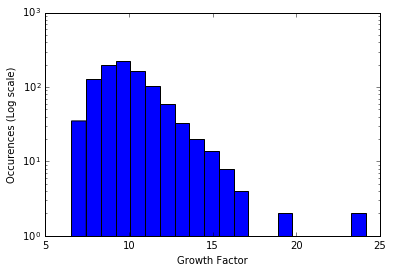

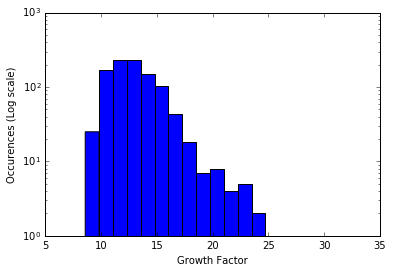

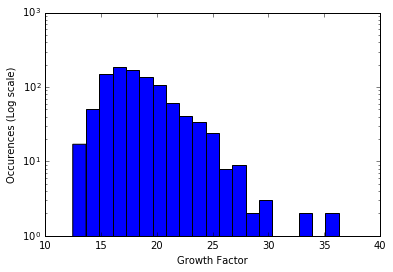

In [26]:
n_values = [10,16,20,40,80,120,200]
for n in n_values:
    data = []
    for _ in range(1000):
        A = uniformRandomMatrix(n)
        data.append(growth_factor(A))
    plt.hist(data, bins=20, log=True)
    plt.xlabel("Growth Factor")
    plt.ylabel("Occurences (Log scale)")
    plt.show()

Fit the data to c*n**a with c = 0.43264264066106356 and a = 0.5283771963626797


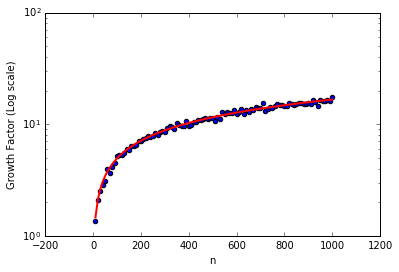

In [27]:
n_range = range(10, 1010, 10)
data = compute_average_gf(n_range, 20, normalRandomMatrix)
exponential = lambda n, c, a: c * n**a
coefficients, _ = curve_fit(exponential, n_range, data)
c, a = coefficients
print("Fit the data to c*n**a with c = {} and a = {}".format(c, a))
plt.scatter(n_range, data, label='data')
plt.plot(n_range, exponential(n_range, c, a), label="exponential fit", color='r', linewidth='2.0')
plt.xlabel("n")
plt.ylabel("Growth Factor (Log scale)")
plt.yscale("log")
plt.show()

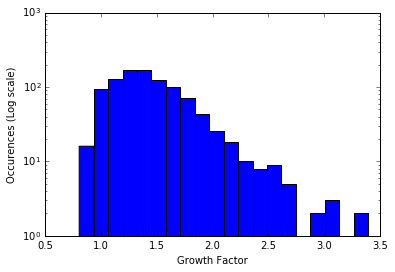

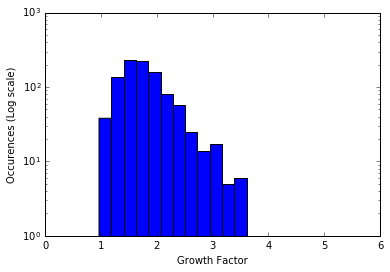

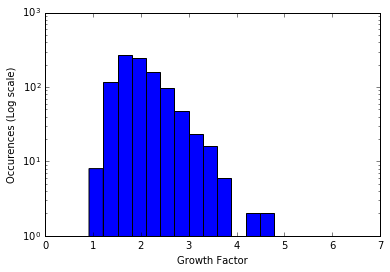

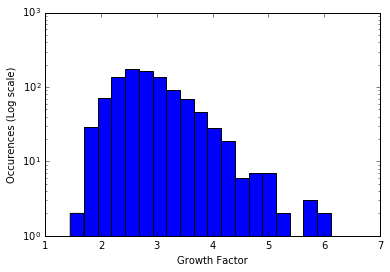

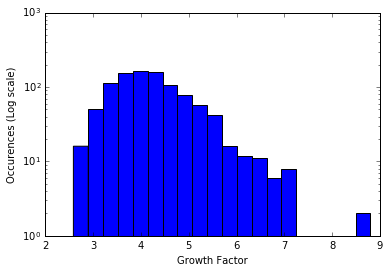

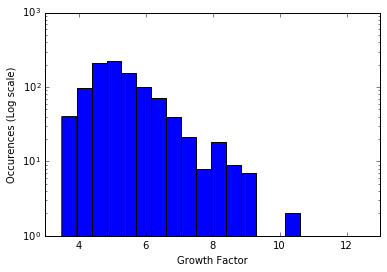

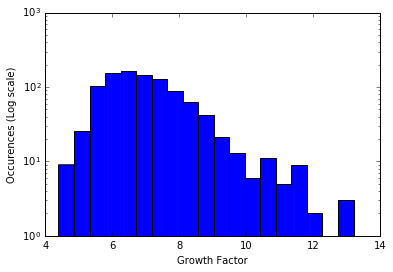

In [28]:
n_values = [10,16,20,40,80,120,200]
for n in n_values:
    data = []
    for _ in range(1000):
        A = normalRandomMatrix(n)
        data.append(growth_factor(A))
    plt.hist(data, bins=20, log=True)
    plt.xlabel("Growth Factor")
    plt.ylabel("Occurences (Log scale)")
    plt.show()